In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import missingno as msno

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
ga_sessions = pd.read_csv('data/ga_sessions.csv', sep = ',')
ga_sessions

C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\1255310818.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ga_sessions = pd.read_csv('data/ga_sessions.csv', sep = ',')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


In [3]:
ga_sessions.describe(include='all')

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1860042,1.860042e+06,1860042,1860042,1.860042e+06,1859945,1860042,1640439,1524427,777981,1860042,789904,1492864,16338,1860042,1860042,1860042,1860042
unique,1860042,1.391717e+06,226,85318,NaN,293,56,412,286,1219,3,13,205,104,5039,57,166,2548
top,9055434745589932991.1637753792.1637753792,1.750498e+09,2021-05-24,12:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,4.620000e+02,39453,61067,NaN,578290,552272,463481,1006599,506819,1474871,464054,551088,9778,169090,1013436,1800565,805329
mean,NaN,NaN,NaN,NaN,2.712804e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.182907e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for column in ga_sessions.columns:
    unique_values = ga_sessions[column].value_counts()
    print(f'Характеристика: {column}')
    print(f'Количество уникальных значений: {unique_values.count()}')
    print(f'Список значений: {unique_values}')

Характеристика: session_id
Количество уникальных значений: 1860042
Список значений: session_id
9055434745589932991.1637753792.1637753792    1
6294640354816492625.1638728787.1638728809    1
6294832296889291185.1623245519.1623245519    1
6294832296889291185.1623161065.1623161065    1
6294832296889291185.1623156608.1623156608    1
                                            ..
3525580570051063315.1625927189.1625927189    1
3525573324456022940.1640876964.1640876964    1
3525573324456022940.1640837067.1640837067    1
3525573324456022940.1640715164.1640715164    1
9055430416266113553.1640968742.1640968742    1
Name: count, Length: 1860042, dtype: int64
Характеристика: client_id
Количество уникальных значений: 1391717
Список значений: client_id
1.750498e+09    462
1.309184e+08    334
1.266575e+09    309
7.368596e+08    306
1.894772e+09    276
               ... 
8.789419e+08      1
8.789399e+08      1
8.789397e+08      1
8.789339e+08      1
2.108382e+09      1
Name: count, Length: 1391717, dt

In [5]:
ga_sessions[ga_sessions.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


In [6]:
print('Информация о выборке:\n')
ga_sessions.info()

Информация о выборке:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


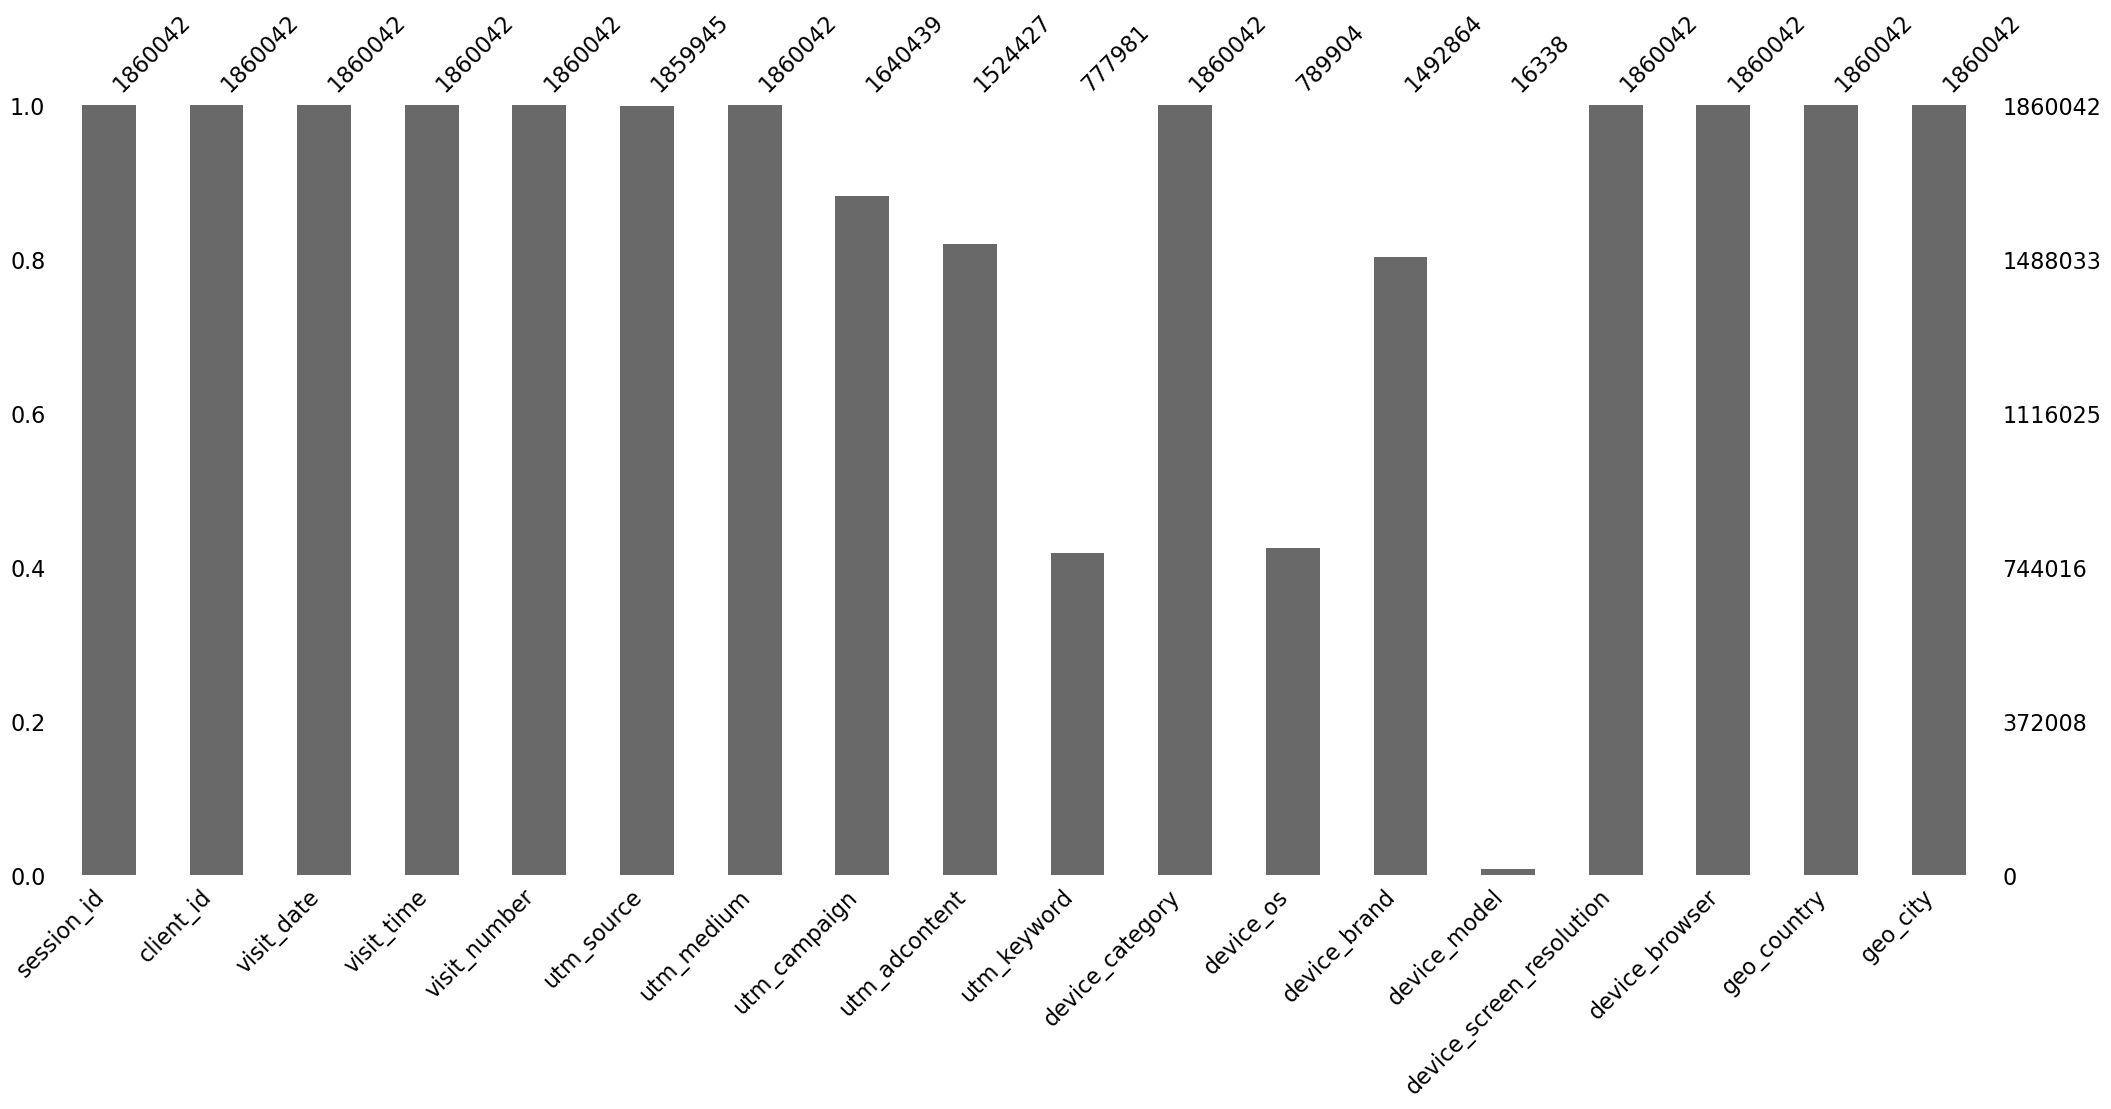

In [7]:
msno.bar(ga_sessions);

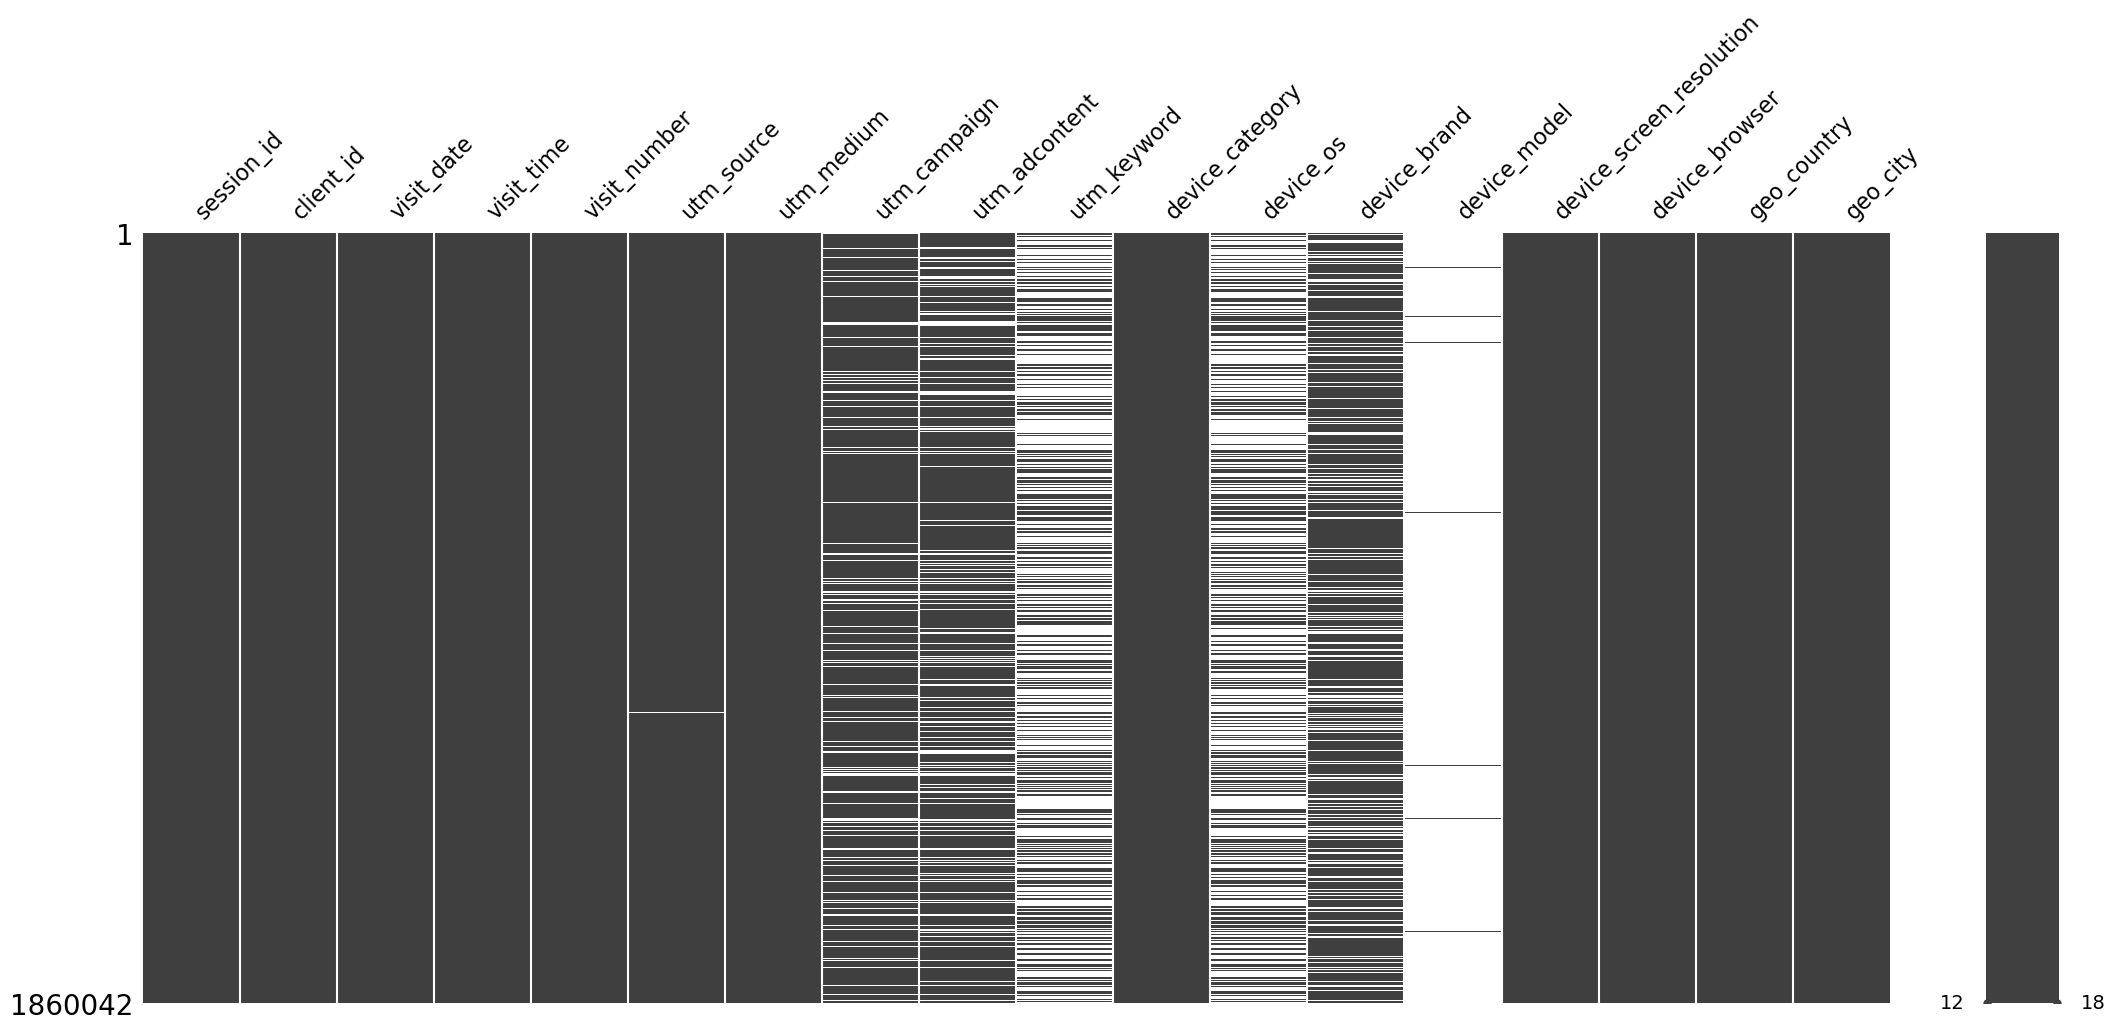

In [8]:
msno.matrix(ga_sessions);

In [9]:
missing_values = ((ga_sessions.isna().sum() / len(ga_sessions)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


session_id                   0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_country                  0.000000
utm_medium                   0.000000
geo_city                     0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_source                   0.005215
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
device_os                   57.533002
utm_keyword                 58.174009
device_model                99.121633
dtype: float64

In [10]:
# Дополнительно проверим заполненность фичи device_model
ga_sessions['device_model'].value_counts(dropna=False)

device_model
NaN                     1843704
AuMdmADEIoPXiWpTsBEj       9778
tWBQlsvNfHxRUjaPAfhd        653
cwMJxNXiWUgMUxGiCTPs        651
pTgAEPipQxDXCjPrJbHo        461
                         ...   
LDCqZZOpaddysclyNkHj          1
MBGYWAQSYWUphNxTsAWD          1
VDidzTqFGxuqiRQJGrwB          1
aWSBcBZlKorTFjJGlWKG          1
niQdLVcBlNylrEuNcCYH          1
Name: count, Length: 105, dtype: int64

In [11]:
# Так как в фиче device_model заполнено меньше одного процента, считаем данную фичу неинформативной и удаляем.
ga_sessions = ga_sessions.drop(columns=['device_model'])
ga_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow


In [12]:
# Проверим, сколько полностью заполненных объектов во всём наборе данных.
print('Количество полностью заполненных объектов из всей выборки:', len(ga_sessions.dropna()))
print('Процент полностью заполненных объектов из всей выборки:', round(len(ga_sessions.dropna()) / len(ga_sessions) * 100, 2))

Количество полностью заполненных объектов из всей выборки: 578427
Процент полностью заполненных объектов из всей выборки: 31.1


In [13]:
# Дополнительно проверим заполненность фичей device_os, utm_keyword и device_brand
print(ga_sessions['device_os'].value_counts(dropna=False))
print(ga_sessions['utm_keyword'].value_counts(dropna=False))
print(ga_sessions['device_brand'].value_counts(dropna=False))

device_os
NaN              1070138
Android           464054
iOS               207104
Windows            88307
Macintosh          24824
Linux               5120
(not set)            364
Chrome OS             83
BlackBerry            27
Tizen                  7
Samsung                4
Windows Phone          4
Firefox OS             3
Nokia                  3
Name: count, dtype: int64
utm_keyword
NaN                     1082061
puhZPIYqKXeFPaUviSjo     506819
aXQzDWsJuGXeBXexNHjc      24241
pHqgLcdBQPSLcrTpLkdr      13767
ITfrGJNwVsHBGJMAKoct      13353
                         ...   
XsuVVTgiDIxZtndPjvDm          1
WhaUakldaAmpLumfaADO          1
nJVPLgfxsBtPAXttNVDI          1
nwKBdMZKktIQFvhZwbFe          1
fcXWTQaKfxbkBkBnzLhK          1
Name: count, Length: 1220, dtype: int64
device_brand
Apple       551088
NaN         367178
Samsung     332194
Xiaomi      288367
Huawei      185853
             ...  
Vodafone         1
Wexler           1
KingSing         1
Star             1
Opera  

In [14]:
# Запонилним пропущенные значения в фиче device_brand на основе фичи device_os
ga_sessions.device_brand.loc[ga_sessions.device_brand.isna()] = ga_sessions.device_os.loc[ga_sessions.device_os.isna()].apply(lambda x: 'Apple' if x == 'iOS'
                                                                                                                  else ('Microsoft' if x == 'Windows'
                                                                                                                  else ('Other')))

# Перепроверим заполненность фичи device_brand
ga_sessions['device_brand'].value_counts(dropna=False)

C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\525907990.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ga_sessions.device_brand.loc[ga_sessions.device_brand.isna()] = ga_sessions.device_os.loc[ga_sessions.device_os.isna()].

device_brand
Apple       551088
Samsung     332194
Xiaomi      288367
Other       248500
Huawei      185853
             ...  
Vodafone         1
Wexler           1
KingSing         1
Star             1
Opera            1
Name: count, Length: 207, dtype: int64

In [15]:
# После заполнения фичи device_brand, так как в фичах device_os и utm_keyword заполнено меньше половины значений, 
# считаем данные фичи неинформативными и удаляем.
ga_sessions = ga_sessions.drop(columns=['device_os', 'utm_keyword'])
ga_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,mobile,Xiaomi,393x786,Chrome,Russia,Moscow


In [16]:
# Пропуски в фичах utm_source, utm_campaign и utm_adcontent заполним модой (самым часто встречающимся значением).
# Сохраним в переменную categorical имена всех категориальных признаков
categorical = ga_sessions.select_dtypes(include=['object']).columns

# В категориальных фичах заменяем пропуски модой
for feat in categorical:
    ga_sessions[feat].fillna(ga_sessions[feat].mode()[0], inplace=True)
    #df_clean[feat] = df_clean[feat].fillna(df_clean[feat].mode()[0])

C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\2983798762.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ga_sessions[feat].fillna(ga_sessions[feat].mode()[0], inplace=True)


In [17]:
missing_values = ((ga_sessions.isna().sum() / len(ga_sessions)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
device_category             0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
dtype: float64

In [18]:
ga_hits = pd.read_csv('data/ga_hits.csv', sep = ',')
ga_hits

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


In [19]:
values = [
    'sub_car_claim_click', 
    'sub_car_claim_submit_click', 
    'sub_open_dialog_click', 
    'sub_custom_question_submit_click', 
    'sub_call_number_click', 
    'sub_callback_submit_click', 
    'sub_submit_success', 
    'sub_car_request_submit_click'
]

# Заполнение столбца event_value
ga_hits['event_value'] = ga_hits['event_action'].apply(lambda x: 1 if x in values else 0)
ga_hits['event_value'].value_counts(dropna=False)

event_value
0    15621562
1      104908
Name: count, dtype: int64

In [20]:
ga_hits.columns

Index(['session_id', 'hit_date', 'hit_time', 'hit_number', 'hit_type',
       'hit_referer', 'hit_page_path', 'event_category', 'event_action',
       'event_label', 'event_value'],
      dtype='object')

In [21]:
# Удаляем ненужные колонки 

columns_to_drop = [
    'hit_date',
    'hit_time',
    'hit_number',
    'hit_type',
    'hit_referer',
    'hit_page_path',
    'event_category',
    'event_action',
    'event_label',
]

ga_hits.drop(columns_to_drop, axis=1, inplace=True)
ga_hits

,session_id,event_value
0,5639623078712724064.1640254056.1640254056,0
1,7750352294969115059.1640271109.1640271109,0
2,885342191847998240.1640235807.1640235807,0
3,142526202120934167.1640211014.1640211014,0
4,3450086108837475701.1640265078.1640265078,0
...,...,...
15726465,6866159858916559617.1640270865.1640270865,0
15726466,7310304587364460692.1640261783.1640261783,0
15726467,8013702685784312179.1640270195.1640270195,0
15726468,8021505554734405918.1640257821.1640257821,0


In [22]:
ga_hits[ga_hits['session_id'].duplicated()]

,session_id,event_value
23,3117547552978670057.1640217454.1640217454,0
32,3282323002617677961.1640266499.1640266499,0
39,562366956183957396.1640246520.1640246520,0
42,628849304731384746.1640233987.1640233987,0
61,2530706414478031710.1640233887.1640233887,0
...,...,...
15726465,6866159858916559617.1640270865.1640270865,0
15726466,7310304587364460692.1640261783.1640261783,0
15726467,8013702685784312179.1640270195.1640270195,0
15726468,8021505554734405918.1640257821.1640257821,0


In [23]:
ga_hits = ga_hits.drop_duplicates()
ga_hits.shape

(1784748, 2)

In [24]:
ga_hits['event_value'].value_counts(dropna=False)

event_value
0    1733988
1      50760
Name: count, dtype: int64

In [25]:
ga_final = ga_sessions.merge(ga_hits, how='left', on='session_id')
ga_final

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0.0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0.0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0.0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0.0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909745,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,0.0
1909746,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,390x844,Safari,Russia,Stavropol,0.0
1909747,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x667,Safari,Russia,Moscow,0.0
1909748,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0.0


In [26]:
ga_final[ga_final['session_id'].duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
72,9055768928391199041.1623652678.1623652678,2108460508.162365,2021-06-14,09:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Huawei,360x780,Chrome,Russia,Moscow,1.0
77,9055789093275396095.1636395007.1636395007,2108465203.16364,2021-11-08,21:10:07,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,414x736,Safari,Russia,Samara,1.0
81,9055794766915104430.1624305327.1624305327,2108466524.16243,2021-06-21,22:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Other,834x1112,Safari,Russia,Domodedovo,1.0
136,9056028189803556573.1630154471.1630154471,2108520872.163016,2021-08-28,15:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x915,YaBrowser,Russia,Krasnodar,1.0
147,9056093322981390023.1628944098.1628944098,2108536037.162894,2021-08-14,15:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,360x740,Chrome,Russia,Moscow,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909627,9054912872702758664.1636781836.1636781836,2108261192.163678,2021-11-13,08:37:16,1,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,360x800,Chrome,Russia,Moscow,1.0
1909705,9055248417020050011.1634073188.1634073188,2108339317.163408,2021-10-13,00:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,mobile,Huawei,360x780,Chrome,Russia,Nizhny Novgorod,1.0
1909708,9055248417020050011.1634075541.1634075541,2108339317.163408,2021-10-13,00:00:00,3,ZpYIoDJMcFzVoPFsHGJL,banner,SgIUDYUKnyWHVowUOqid,JNHcPlZPxEMWDnRiyoBf,mobile,Huawei,360x780,Chrome,Russia,Nizhny Novgorod,1.0
1909736,9055376699099939975.1630766214.1630766214,2108369185.163077,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Other,1920x1080,Chrome,Russia,Khimki,1.0


In [27]:
ga_final[ga_final['session_id'] == '9054912872702758664.1636781836.1636781836']

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
1909626,9054912872702758664.1636781836.1636781836,2108261192.163678,2021-11-13,08:37:16,1,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,360x800,Chrome,Russia,Moscow,0.0
1909627,9054912872702758664.1636781836.1636781836,2108261192.163678,2021-11-13,08:37:16,1,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,360x800,Chrome,Russia,Moscow,1.0


In [28]:
# Так как в дубликатах есть значение целевого действия 0 и 1 оставим строки с 1
ga_final = ga_final.drop_duplicates(subset=['session_id'], keep='last')
ga_final

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_value
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0.0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0.0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0.0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0.0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909745,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,0.0
1909746,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,390x844,Safari,Russia,Stavropol,0.0
1909747,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x667,Safari,Russia,Moscow,0.0
1909748,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0.0


In [29]:
ga_final['event_value'].value_counts(dropna=False)

event_value
0.0    1686575
NaN     127776
1.0      45691
Name: count, dtype: int64

In [30]:
# На основе фичей visit_date и visit_time создадим новую фичу date формата datetime
ga_final.loc[:, ('date')] = pd.to_datetime(ga_final['visit_date'] + ' ' + ga_final['visit_time'], utc=True)
ga_final['date']

C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\3972595677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_final.loc[:, ('date')] = pd.to_datetime(ga_final['visit_date'] + ' ' + ga_final['visit_time'], utc=True)


0         2021-11-24 14:36:32+00:00
1         2021-11-14 08:21:30+00:00
2         2021-12-28 02:42:06+00:00
3         2021-05-29 05:00:00+00:00
4         2021-05-29 05:00:00+00:00
                     ...           
1909745   2021-12-22 10:48:25+00:00
1909746   2021-05-26 08:00:00+00:00
1909747   2021-11-15 15:31:55+00:00
1909748   2021-11-29 15:36:44+00:00
1909749   2021-12-31 19:39:02+00:00
Name: date, Length: 1860042, dtype: datetime64[ns, UTC]

In [31]:
# на основе даты и времени создадим новые признаки месяц, день недели, утро, день, вечер, ночь 
ga_final.loc[:, ('month')] = ga_final['date'].dt.month
ga_final.loc[:, ('day_of_week')] = ga_final['date'].dt.dayofweek

ga_final.loc[:, ('time_of_day')] = ga_final['date'].dt.time
ga_final.loc[:, ('is_morning')] = (ga_final['time_of_day'] >= pd.Timestamp('06:00:00').time()) & (ga_final['time_of_day'] < pd.Timestamp('12:00:00').time())
ga_final.loc[:, ('is_afternoon')] = (ga_final['time_of_day'] >= pd.Timestamp('12:00:00').time()) & (ga_final['time_of_day'] < pd.Timestamp('18:00:00').time())
ga_final.loc[:, ('is_evening')] = (ga_final['time_of_day'] >= pd.Timestamp('18:00:00').time()) & (ga_final['time_of_day'] < pd.Timestamp('23:59:59').time())
ga_final.loc[:, ('is_night')] = (ga_final['time_of_day'] >= pd.Timestamp('00:00:00').time()) & (ga_final['time_of_day'] < pd.Timestamp('06:00:00').time())
ga_final

C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\4066127013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_final.loc[:, ('month')] = ga_final['date'].dt.month
C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\4066127013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_final.loc[:, ('day_of_week')] = ga_final['date'].dt.dayofweek
C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\4066127013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,geo_city,event_value,date,month,day_of_week,time_of_day,is_morning,is_afternoon,is_evening,is_night
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Zlatoust,0.0,2021-11-24 14:36:32+00:00,11,2,14:36:32,False,True,False,False
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,Moscow,0.0,2021-11-14 08:21:30+00:00,11,6,08:21:30,True,False,False,False
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Krasnoyarsk,0.0,2021-12-28 02:42:06+00:00,12,1,02:42:06,False,False,False,True
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,...,Moscow,0.0,2021-05-29 05:00:00+00:00,5,5,05:00:00,False,False,False,True
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,Moscow,0.0,2021-05-29 05:00:00+00:00,5,5,05:00:00,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909745,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,...,Moscow,0.0,2021-12-22 10:48:25+00:00,12,2,10:48:25,True,False,False,False
1909746,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,Stavropol,0.0,2021-05-26 08:00:00+00:00,5,2,08:00:00,True,False,False,False
1909747,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,Moscow,0.0,2021-11-15 15:31:55+00:00,11,0,15:31:55,False,True,False,False
1909748,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,...,Chelyabinsk,0.0,2021-11-29 15:36:44+00:00,11,0,15:36:44,False,True,False,False


In [32]:
# Поменяем формат фанных в столбцах всемени суток на int
ga_final['is_morning'] = ga_final['is_morning'].astype(int)
ga_final['is_afternoon'] = ga_final['is_afternoon'].astype(int)
ga_final['is_evening'] = ga_final['is_evening'].astype(int)
ga_final['is_night'] = ga_final['is_night'].astype(int)
ga_final

C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\10189372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_final['is_morning'] = ga_final['is_morning'].astype(int)
C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\10189372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_final['is_afternoon'] = ga_final['is_afternoon'].astype(int)
C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\10189372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,geo_city,event_value,date,month,day_of_week,time_of_day,is_morning,is_afternoon,is_evening,is_night
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Zlatoust,0.0,2021-11-24 14:36:32+00:00,11,2,14:36:32,0,1,0,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,Moscow,0.0,2021-11-14 08:21:30+00:00,11,6,08:21:30,1,0,0,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Krasnoyarsk,0.0,2021-12-28 02:42:06+00:00,12,1,02:42:06,0,0,0,1
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,...,Moscow,0.0,2021-05-29 05:00:00+00:00,5,5,05:00:00,0,0,0,1
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,Moscow,0.0,2021-05-29 05:00:00+00:00,5,5,05:00:00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909745,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,...,Moscow,0.0,2021-12-22 10:48:25+00:00,12,2,10:48:25,1,0,0,0
1909746,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,Stavropol,0.0,2021-05-26 08:00:00+00:00,5,2,08:00:00,1,0,0,0
1909747,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,Moscow,0.0,2021-11-15 15:31:55+00:00,11,0,15:31:55,0,1,0,0
1909748,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,...,Chelyabinsk,0.0,2021-11-29 15:36:44+00:00,11,0,15:36:44,0,1,0,0


In [33]:
# Объединим подобные значения фичи device_browser и создадим дополнительную фичу device_browser_new
ga_final.loc[:, ('device_browser_new')] = ga_final.device_browser.apply(lambda x: x.lower().split(' ')[0])

# Заменим значения количество которых меньше 10000 на 'Other'
counts = ga_final['device_browser_new'].value_counts()
ga_final.loc[:, ('device_browser_new')] = ga_final['device_browser_new'].apply(lambda x: x if counts[x] > 10000 else 'Other')

print(ga_final['device_browser_new'].value_counts())

C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\1892833962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_final.loc[:, ('device_browser_new')] = ga_final.device_browser.apply(lambda x: x.lower().split(' ')[0])


device_browser_new
chrome       1013436
safari        548474
yabrowser     133311
android        55832
samsung        47309
opera          26862
firefox        16588
edge           16065
Other           2165
Name: count, dtype: int64


In [34]:
# В фиче geo_city заменим значения, количество которых меньше 1000 на 'Other'
counts1 = ga_final['geo_city'].value_counts()
ga_final.loc[:, ('geo_city_new')] = ga_final['geo_city'].apply(lambda x: x if counts1[x] > 1000 else 'Other')

print(ga_final['geo_city_new'].value_counts())

geo_city_new
Moscow              805329
Saint Petersburg    296788
Other                88658
(not set)            78172
Yekaterinburg        35788
                     ...  
Severodvinsk          1050
Fort Worth            1039
Dedovsk               1036
Serpukhov             1033
Ivanteyevka           1010
Name: count, Length: 128, dtype: int64


C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\2245090458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_final.loc[:, ('geo_city_new')] = ga_final['geo_city'].apply(lambda x: x if counts1[x] > 1000 else 'Other')


In [35]:
# В фиче utm_campaign заменим значения, количество которых меньше 500 на 'Other'
counts2 = ga_final['utm_campaign'].value_counts()
ga_final.loc[:, ('utm_campaign_new')] = ga_final['utm_campaign'].apply(lambda x: x if counts2[x] > 500 else 'Other')

print(ga_final['utm_campaign_new'].value_counts())

utm_campaign_new
LTuZkdKfxRGVceoWkVyg    683084
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
gecBYcKZCPMcVYdSSzKP    134042
TmThBvoCcwkCZZUWACYq     26597
                         ...  
RxecHElWobBxIeAkqFXV       587
qTERPbkOaRvjtQXXEwdb       552
sTkjcuMUikyInvCPLqNT       538
pPhTYiQubZFNCSnIbPJs       522
akoPqAqaJrLGbjrrIVPH       522
Name: count, Length: 108, dtype: int64


C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\1447968938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_final.loc[:, ('utm_campaign_new')] = ga_final['utm_campaign'].apply(lambda x: x if counts2[x] > 500 else 'Other')


In [36]:
# В фиче utm_adcontent заменим значения, количество которых меньше 100 на 'Other'
counts3 = ga_final['utm_adcontent'].value_counts()
ga_final.loc[:, ('utm_adcontent_new')] = ga_final['utm_adcontent'].apply(lambda x: x if counts3[x] > 100 else 'Other')

print(ga_final['utm_adcontent_new'].value_counts())

utm_adcontent_new
JNHcPlZPxEMWDnRiyoBf    1342214
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
LLfCasrxQzJIyuldcuWy      24222
                         ...   
togKdkbomlWcHNkZFveU        109
hrqYkXkJsxqBbbPugYJm        107
QCjbxkecYPvHpsJxBXej        104
jydEWYUtqCvdQucWTOqa        102
htRZUQDANvNrHaxZjsjz        101
Name: count, Length: 85, dtype: int64


C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\3073048551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_final.loc[:, ('utm_adcontent_new')] = ga_final['utm_adcontent'].apply(lambda x: x if counts3[x] > 100 else 'Other')


In [37]:
# В фиче utm_source_new заменим значения, количество которых меньше 100 на 'Other'
counts4 = ga_final['utm_source'].value_counts()
ga_final.loc[:, ('utm_source_new')] = ga_final['utm_source'].apply(lambda x: x if counts4[x] > 100 else 'Other')

print(ga_final['utm_source_new'].value_counts())

utm_source_new
ZpYIoDJMcFzVoPFsHGJL    578387
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
                         ...  
vNNYHvZtTVtJICHsjBBL       129
HbolMJUevblAbkHClEQa       128
WeIwsqEbpZGZwhcQktNS       114
DlnuGwaJBHGNEKdWfOpe       114
CFeqZLBNQdYHxJrTOHjY       101
Name: count, Length: 65, dtype: int64


C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\3613427049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_final.loc[:, ('utm_source_new')] = ga_final['utm_source'].apply(lambda x: x if counts4[x] > 100 else 'Other')


In [38]:
ga_final.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'device_category', 'device_brand', 'device_screen_resolution',
       'device_browser', 'geo_country', 'geo_city', 'event_value', 'date',
       'month', 'day_of_week', 'time_of_day', 'is_morning', 'is_afternoon',
       'is_evening', 'is_night', 'device_browser_new', 'geo_city_new',
       'utm_campaign_new', 'utm_adcontent_new', 'utm_source_new'],
      dtype='object')

In [39]:
# Удаляем лишние колонки 

columns_to_drop = [
    'session_id',
    'client_id',
    'visit_date',
    'visit_time',
    'visit_number',
    'utm_source',
    'utm_campaign',
    'utm_adcontent',
    'device_browser',
    'date',
    'time_of_day',
    'device_screen_resolution',
    'device_browser',
    'geo_city'
]

ga_final.drop(columns_to_drop, axis=1, inplace=True)
ga_final

C:\Users\Железко Кирилл\AppData\Local\Temp\ipykernel_11292\3531403775.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_final.drop(columns_to_drop, axis=1, inplace=True)


,utm_medium,device_category,device_brand,geo_country,event_value,month,day_of_week,is_morning,is_afternoon,is_evening,is_night,device_browser_new,geo_city_new,utm_campaign_new,utm_adcontent_new,utm_source_new
0,banner,mobile,Huawei,Russia,0.0,11,2,0,1,0,0,chrome,Other,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,ZpYIoDJMcFzVoPFsHGJL
1,cpm,mobile,Samsung,Russia,0.0,11,6,1,0,0,0,samsung,Moscow,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,MvfHsxITijuriZxsqZqt
2,banner,mobile,Huawei,Russia,0.0,12,1,0,0,0,1,chrome,Krasnoyarsk,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,ZpYIoDJMcFzVoPFsHGJL
3,cpc,mobile,Xiaomi,Russia,0.0,5,5,0,0,0,1,chrome,Moscow,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,kjsLglQLzykiRbcDiGcD
4,cpc,mobile,Xiaomi,Russia,0.0,5,5,0,0,0,1,chrome,Moscow,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,kjsLglQLzykiRbcDiGcD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909745,cpc,desktop,Apple,Russia,0.0,12,2,1,0,0,0,chrome,Moscow,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,BHcvLfOaCWvWTykYqHVe
1909746,(none),mobile,Apple,Russia,0.0,5,2,1,0,0,0,safari,Stavropol,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,fDLlAcSmythWSCVMvqvL
1909747,(none),mobile,Apple,Russia,0.0,11,0,0,1,0,0,safari,Moscow,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,fDLlAcSmythWSCVMvqvL
1909748,banner,mobile,Xiaomi,Russia,0.0,11,0,0,1,0,0,chrome,Chelyabinsk,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,ZpYIoDJMcFzVoPFsHGJL


In [40]:
print('Информация о выборке:\n')
ga_final.info()

Информация о выборке:

<class 'pandas.core.frame.DataFrame'>
Index: 1860042 entries, 0 to 1909749
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   utm_medium          object 
 1   device_category     object 
 2   device_brand        object 
 3   geo_country         object 
 4   event_value         float64
 5   month               int32  
 6   day_of_week         int32  
 7   is_morning          int32  
 8   is_afternoon        int32  
 9   is_evening          int32  
 10  is_night            int32  
 11  device_browser_new  object 
 12  geo_city_new        object 
 13  utm_campaign_new    object 
 14  utm_adcontent_new   object 
 15  utm_source_new      object 
dtypes: float64(1), int32(6), object(9)
memory usage: 198.7+ MB


In [41]:
# Кодируем категориальные фичи с помощью OneHotEncoder

columns_to_encode = [
    'utm_source_new', 
    'utm_medium', 
    'utm_campaign_new', 
    'utm_adcontent_new', 
    'device_category', 
    'device_brand',
    'geo_country',
    'geo_city_new',
    'device_browser_new'
]

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(ga_final[columns_to_encode])

ga_final.loc[:, encoder.get_feature_names_out()] = encoder.transform(ga_final[columns_to_encode])
ga_final.head()

,utm_medium,device_category,device_brand,geo_country,event_value,month,day_of_week,is_morning,is_afternoon,is_evening,...,geo_city_new_Zhukovskiy,device_browser_new_Other,device_browser_new_android,device_browser_new_chrome,device_browser_new_edge,device_browser_new_firefox,device_browser_new_opera,device_browser_new_safari,device_browser_new_samsung,device_browser_new_yabrowser
0,banner,mobile,Huawei,Russia,0.0,11,2,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,cpm,mobile,Samsung,Russia,0.0,11,6,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,banner,mobile,Huawei,Russia,0.0,12,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,cpc,mobile,Xiaomi,Russia,0.0,5,5,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cpc,mobile,Xiaomi,Russia,0.0,5,5,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Масштабируем числовые фичи

scaler = StandardScaler()
ga_final.loc[:, ('month_std')] = scaler.fit_transform(ga_final[['month']])

In [45]:
ga_final.head()

,utm_medium,device_category,device_brand,geo_country,event_value,month,day_of_week,is_morning,is_afternoon,is_evening,...,device_browser_new_Other,device_browser_new_android,device_browser_new_chrome,device_browser_new_edge,device_browser_new_firefox,device_browser_new_opera,device_browser_new_safari,device_browser_new_samsung,device_browser_new_yabrowser,month_std
0,banner,mobile,Huawei,Russia,0.0,11,2,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.760687
1,cpm,mobile,Samsung,Russia,0.0,11,6,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.760687
2,banner,mobile,Huawei,Russia,0.0,12,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.215280
3,cpc,mobile,Xiaomi,Russia,0.0,5,5,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.966869
4,cpc,mobile,Xiaomi,Russia,0.0,5,5,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.966869


In [46]:
# Удаляем колонку month

ga_final.drop('month', axis=1, inplace=True)
ga_final

MemoryError: Unable to allocate 14.2 MiB for an array with shape (1860042, 1) and data type float64

In [42]:
# инициализация входных фичей и целевой переменной
ga_final_prepared = ga_final.copy()

X = ga_final_prepared.drop(['event_value'], axis=1)
y = ga_final_prepared['event_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

MemoryError: Unable to allocate 11.5 GiB for an array with shape (827, 1860042) and data type float64

In [ ]:
# обучение модели здесь
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
# рассчет метрики качества на тренировочной выборке
roc_auc_score(y_train, logreg.predict(X_train))

In [ ]:
# предикт на тестовых данных
logreg_pred = logreg.predict(X_test)
print(accuracy_score(y_test, logreg_pred))
print(confusion_matrix(y_test, logreg_pred))